In [1]:
!featurize dataset download 5653c901-0c4c-44e2-b542-294e5ae43f06

100%|██████████████████████████████████████| 49.7M/49.7M [00:00<00:00, 272MiB/s]
🍬  下载完成，正在解压...
🏁  数据集已经成功添加


In [2]:
import os
import shutil
import random
from pathlib import Path

def split_dataset(src_base_path, dest_base_path, categories, train_ratio, valid_ratio, test_ratio):
    assert train_ratio + valid_ratio + test_ratio == 1, "Ratios should add up to 1."
    
    # 创建目录结构
    subfolders = ['train', 'valid', 'test']
    for subfolder in subfolders:
        for category in categories:
            os.makedirs(os.path.join(dest_base_path, subfolder, category), exist_ok=True)
    
    # 分配图片到训练集、验证集和测试集
    for category in categories:
        category_path = Path(src_base_path) / category
        image_files = list(category_path.glob('*.*'))
        
        random.shuffle(image_files)
        
        train_count = int(len(image_files) * train_ratio)
        valid_count = int(len(image_files) * valid_ratio)
        
        train_files = image_files[:train_count]
        valid_files = image_files[train_count:train_count + valid_count]
        test_files = image_files[train_count + valid_count:]
        
        for file in train_files:
            shutil.copy(file, os.path.join(dest_base_path, 'train', category, file.name))
        
        for file in valid_files:
            shutil.copy(file, os.path.join(dest_base_path, 'valid', category, file.name))
        
        for file in test_files:
            shutil.copy(file, os.path.join(dest_base_path, 'test', category, file.name))



In [3]:
src_base_path = 'Untitled Folder'
dest_base_path = 'data'
categories = ['chevrolet', 'ford','honda','hyundai','kia','subaru','toyota','volkswagen']
train_ratio, valid_ratio, test_ratio = 0.6, 0.2, 0.2

split_dataset(src_base_path, dest_base_path, categories, train_ratio, valid_ratio, test_ratio)

In [4]:
!pip install fastai

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.7/232.7 kB 141.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 114.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 155.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.9/156.9 kB 123.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.4/922.4 kB 165.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.0/493.0 kB 154.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 96.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 86.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.0/182.0 kB 134.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 166.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
!pip install ipywidgets

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 105.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 158.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 157.2 MB/s eta 0:00:00


In [6]:
from fastai.vision.all import *
from fastai.vision.widgets import *

# 指定数据集路径
path = Path(dest_base_path)

In [7]:
item_tfms=Resize(224)
batch_tfms=aug_transforms()

In [8]:
dls = ImageDataLoaders.from_folder(path,
                                   train='train', 
                                   valid='valid', 
                                   seed=42, 
                                   item_tfms=item_tfms,
                                   batch_tfms=batch_tfms)

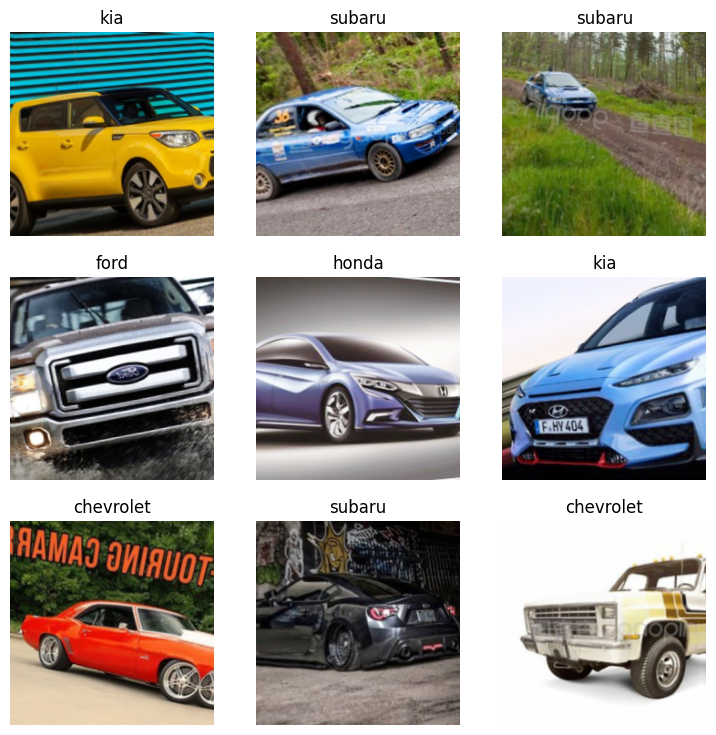

In [9]:
dls.show_batch()

In [10]:
arch = resnet18

In [11]:
learn = vision_learner(dls, arch, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/featurize/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 286MB/s]


SuggestedLRs(valley=0.0008317637839354575)

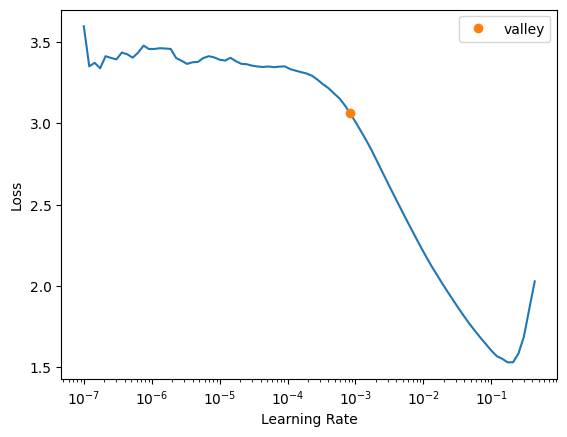

In [12]:
learn.lr_find()

In [42]:
# fine tune the model
learn.fine_tune(10, 1e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.000065,2.121247,0.562500,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.000099,2.109104,0.562500,00:01
1,0.000144,2.113652,0.562500,00:01
2,0.000195,2.113607,0.562500,00:01
3,0.000175,2.107934,0.562500,00:01
4,0.000162,2.133646,0.531250,00:01
5,0.000165,2.133815,0.531250,00:01
6,0.000146,2.130841,0.531250,00:01
7,0.000128,2.141391,0.531250,00:01
8,0.000121,2.128599,0.531250,00:01
9,0.000146,2.148083,0.500000,00:01


In [43]:
# fine tune the model
learn.fine_tune(10, 8e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.001245,2.133601,0.531250,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.003515,2.114060,0.531250,00:01
1,0.001814,2.087190,0.531250,00:01
2,0.001207,2.083402,0.531250,00:01
3,0.000949,2.085094,0.531250,00:01
4,0.000754,2.063210,0.531250,00:01
5,0.000624,2.074596,0.531250,00:01
6,0.000537,2.071836,0.531250,00:01
7,0.000470,2.078861,0.531250,00:01
8,0.000416,2.064873,0.531250,00:01
9,0.000375,2.041140,0.531250,00:01


In [44]:
# fine tune the model
learn.fine_tune(10, 15e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.000050,2.031801,0.531250,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.000381,2.005313,0.531250,00:01
1,0.000211,2.056215,0.500000,00:01
2,0.000188,2.079298,0.531250,00:01
3,0.000254,2.158949,0.531250,00:01
4,0.000217,2.223356,0.531250,00:01
5,0.000184,2.285908,0.562500,00:01
6,0.000165,2.300451,0.562500,00:01
7,0.000418,2.331196,0.562500,00:01
8,0.000375,2.337863,0.562500,00:01
9,0.000336,2.300107,0.562500,00:01


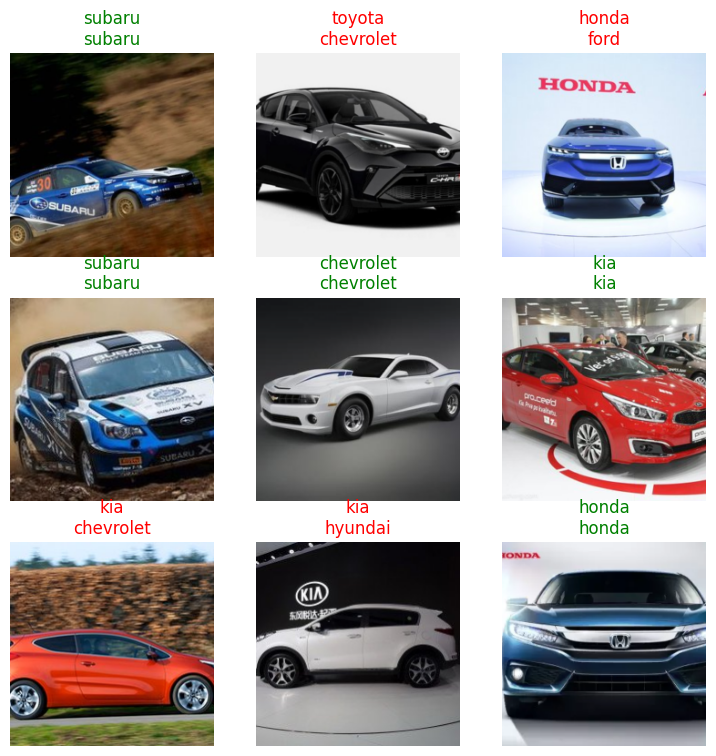

In [46]:
# show results
learn.show_results()

In [47]:
test_dl = dls.test_dl(get_image_files(path/'test'), with_labels=True)

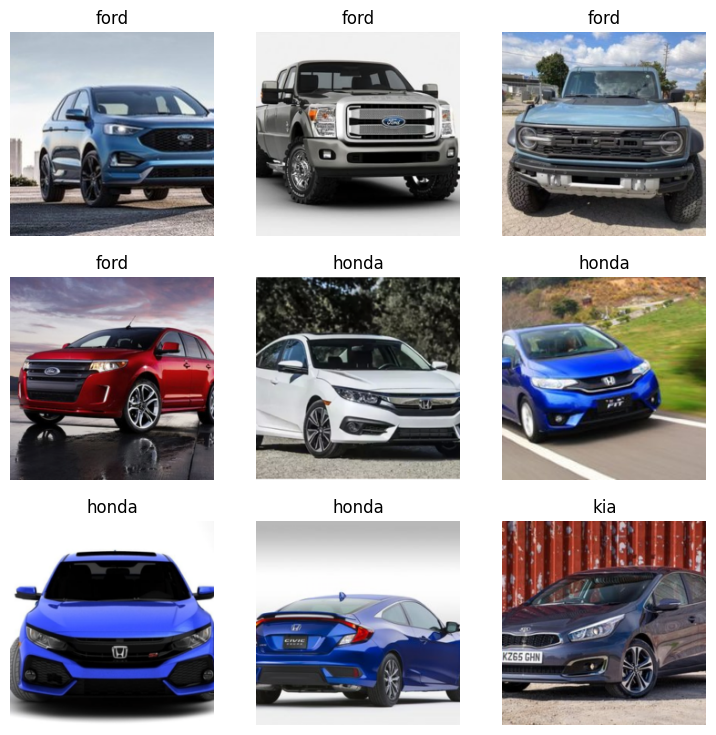

In [48]:
test_dl.show_batch()

In [49]:
# preds, targets, decodes = learn.get_preds(dl=test_dl, with_decoded=True)
preds, targets = learn.get_preds(dl=test_dl)

In [50]:
from fastai.tabular.all import *

In [51]:
accuracy(preds, targets)

TensorBase(0.4412)

In [52]:
# Create the interpretation object using the from_learner method
interp = ClassificationInterpretation.from_learner(learn, dl=test_dl)

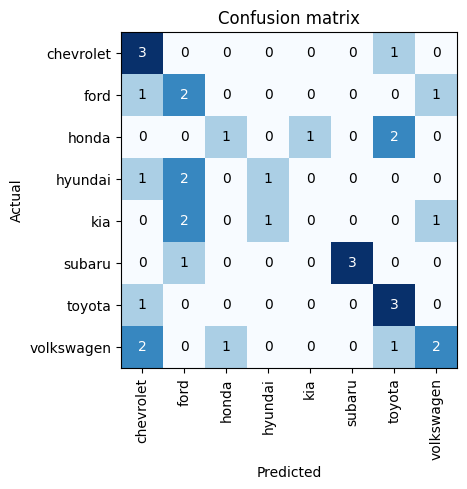

In [53]:
# Plot the confusion matrix
interp.plot_confusion_matrix()

In [54]:
# Show per-class metrics (e.g., precision, recall, F1-score)
interp.print_classification_report()

              precision    recall  f1-score   support

   chevrolet       0.38      0.75      0.50         4
        ford       0.29      0.50      0.36         4
       honda       0.50      0.25      0.33         4
     hyundai       0.50      0.25      0.33         4
         kia       0.00      0.00      0.00         4
      subaru       1.00      0.75      0.86         4
      toyota       0.43      0.75      0.55         4
  volkswagen       0.50      0.33      0.40         6

    accuracy                           0.44        34
   macro avg       0.45      0.45      0.42        34
weighted avg       0.45      0.44      0.42        34



In [55]:
model_path='cars.pkl'

In [56]:
learn.export(model_path)